# Playing with IPython and Golden Acrylic paints

tl;dr: [Golden Acrylics](https://www.goldenpaints.com/) put up L\*a\*b\* color information about their paints, let's do some visualizations on this using Python's [Colour-Science](https://pypi.org/project/colour-science/) library.

## An *extremely* brief rant on colors
I need to actually write some of this up.

You may have learned in art class in grade school that the primaries are red, yellow, and blue.  Or you might notice that your monitor is a red/green/blue display and your printer is a cyan/magenta/yellow/black device.

red/yellow/blue as the primaries is pretty much just a simplification.  In the days of yore, the usual red was a bit magenta and the blue was a bit cyan and you'd kinda get reasonable colors.

If you play with paints, you rapidly discover that all of this goes out the window and very strange things happen.  There's a lot going on.

Pretty darn good results can be had from carefully selected yellow, blue, green, and red paints, better results with a few more pigments than that.


## An *extremely* brief rant on paint manufacturers

Cars are a very extreme case of reliability as compared to paintings.  If I were to purchase a painting and then put it out on my back patio for a few years and complain to the artist that it was all faded now, they'd laugh in my face.  Conversely, if you were to tell a car owner that they needed to not have their car out in the sun very much, they'd laugh in your face.  But they'd also make sure to manifest an accute case of bad breath before they did it.

A good number of years ago, there was a particular brown-ish paint color for cars that was really popular.  And so a pigment was very popular for this brown sort of car, called Quinacridone Gold (PO49).  Pigment manufacturers fell over each other to supply this pigment.

Eventually, some paint manufacturers started shipping that in their paints.

Some years later, that color became unpopular.  Carmakers stopped buying that pigment.

When artists found out that a favorite color was going away, they freaked out.  However, you will notice that, even though it was an extremely popular pigment, none of the paint makers that had artist-grade product had anything near the level of volume necessary to fund one particular very popular pigment on their own.

Paint makers try to sell you on being magical fairy-dust factories, but my impression is that they are merely a last step on a giant chemical pipeline.  Except that it's a very important and difficult last step.

I did some digging and I could buy the requisite pigments, acrylic emulsions, additives, et al. on the open market, although much of this requires that I'd be able to execute a sales contract with a company that very much does not sell to rando hobbyists.  The hard part is ensuring that everything is well-formulated, regularly tested to make sure that someone didn't accidentally substitute the wrong ingredients, appeals to a wide variety of artists, is distributed in nice stores, et al.

I view it as part of the compact that paint manufacturers are going to provide relevant artist information to save me from tests and also the useful specifications of the working properties of the paint.  Which, I might add, a lot of manufacturers don't.

## Single-pigment paints

Some years ago, I came upon [Handprint](https://www.handprint.com/HP/WCL/water.html), which was written by someone who is as obsessive as I am, but a better artist.  And it caused me to pick up a different mindset.

Basically, the more pigments you are mixing at the same time, the more chances that you have for your colors to turn to mud.

Also, if you mix two intense pigments, you will tend to get a less-intense color.

If you look at the store, there will be interesting named paints like "Flesh" or "Green Gold" or "Permenant Violet".  And, frequently, you'll see paints accurately named like "Alazarin Crimson Hue" where the "Hue" designates that if you get a book on painting and the writer says "Use Alazarin Crimson on the skin of your fairy" you can get Alazarin Crimson Hue and it'll probably work just fine.

On the other hand, there are less imaganitively named paints like "Benzimidazolone Yellow Medium", where you are buying a paint that only contains a single pigment.  Which means that things are more predictable, mud is avoided, and colors can be more intense.

## Color listing

Below is a Python array of dicts with a few pieces of metainformation off of Golden's site for some paints I've got:

In [1]:
colors = [
    {"color": "Benzimidazolone Yellow Medium", "index_name": "PY154", "index_number": "11781", "lab": "L*80.04 a*15.76 b*93.13"},
    {"color": "Pyrrole Orange", "index_name": "PO73", "index_number": "561170", "lab": "L*55.97 a*59.52 b*53.43"},
    {"color": "Quinacridone Magenta ", "index_name": "PR122", "index_number": "73915", "lab": "L*31.41 a*27.69 b*2.75"},
    {"color": "Phthalo Blue GS", "index_name": "PB15:3", "index_number": "74160", "lab": "L*24.95 a*8.48 b*-18.01"},
    {"color": "Pyrrole Red", "index_name": "PR254", "index_number": "56110", "lab": "L*42.26 a*54.6 b*31.25"},
    {"color": "Anthraquinone Blue", "index_name": "PB60", "index_number": "69800", "lab": "L*24.44 a*5.02 b*-6", "munsell": None},
    {"color": "Titanium White", "index_name": "PW 6", "index_number": "77891", "lab": "L*98.28 a*-0.9 b*1.67", "munsell": "white"},
    {"color": "Carbon Black", "index_name": "PBk 7", "index_number": "77266", "lab": "L*25.77 a*0.2 b*-0.17", "munsell": "black"}
]

In [2]:
import re
import math
import colour
import colour.plotting
import matplotlib.pyplot as plt

%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
%config InlineBackend.rc = {'font.size': 10, 'figure.figsize': (10.0, 6.0),'figure.dpi': 72}

## Converting the data

Okay, for later purposes, we're going to start with the provided L\*a\*b\* colors and turn them into a few extra formats.  

First, we're going to convert them to CIE L\*C\*Hab, because that gives you a perceptual color wheel that's a little more accurate than HSV.  Then, we're going to convert them to XYZ, then to an sRGB value and a hex value suitable for HTML usage.

In [3]:
def parse_lab(color):
    m = re.match("L\*([0-9\.\-]+) a\*([0-9\.\-]+) b\*([0-9\.\-]+)", color["lab"])
    if m:
        color["lab"] = [float(m.group(1)), float(m.group(2)), float(m.group(3))]
    else:
        raise Exception("can't parse L*a*b* color")
    return color

def clip_color_1(color):
    color = [min(x,1.0) for x in color]
    color = [max(x,0.0) for x in color]
    return color

def lab_to_lch(color):
    color["lch"] = colour.Lab_to_LCHab(color["lab"])
    color["xyz"] = colour.Lab_to_XYZ(color["lab"])
    color["rgb"] = clip_color_1(colour.XYZ_to_sRGB(color["xyz"]))
    color["hex"] = colour.notation.RGB_to_HEX(color["rgb"])
    #if "munsell" not in color:
        #xyY = colour.XYZ_to_xyY(color["xyz"])
        #color["munsell"] = colour.xyY_to_munsell_colour(xyY)
    return color

colors = [parse_lab(x) for x in colors]
colors = [lab_to_lch(x) for x in colors]

colors

[{'color': 'Benzimidazolone Yellow Medium',
  'index_name': 'PY154',
  'index_number': '11781',
  'lab': [80.04, 15.76, 93.13],
  'lch': array([ 80.04      ,  94.45408673,  80.39507189]),
  'xyz': array([ 0.60338624,  0.56752172,  0.05178306]),
  'rgb': [1.0, 0.72343212696160075, 0.0],
  'hex': '#ffb800'},
 {'color': 'Pyrrole Orange',
  'index_name': 'PO73',
  'index_number': '561170',
  'lab': [55.97, 59.52, 53.43],
  'lch': array([ 55.97      ,  79.98371897,  41.91373388]),
  'xyz': array([ 0.38432221,  0.23882541,  0.04801886]),
  'rgb': [0.93303335551932276, 0.30868227618381894, 0.16584414898366606],
  'hex': '#ed4e2a'},
 {'color': 'Quinacridone Magenta ',
  'index_name': 'PR122',
  'index_number': '73915',
  'lab': [31.41, 27.69, 2.75],
  'lch': array([ 31.41      ,  27.82622145,   5.6716652 ]),
  'xyz': array([ 0.09500138,  0.06827094,  0.06709652]),
  'rgb': [0.44853721783320882, 0.21743763465104099, 0.27682812641737953],
  'hex': '#723746'},
 {'color': 'Phthalo Blue GS',
  'ind

## Color swatches

Here's the palette displayed as color swatches.

Looking at it, I'm going to point out a methodological error that's obvious when you play with the paints:

Pthalo Blue GS and Quincradone Magenta are really dark, and if I paint a swatch of those paints, it's a lot lighter.  That's because they are dark in "masstone" (meaning a dried thick blob of paint) but when you thin them out, they are brighter.

Also, the Munsell notation is quite different from Golden's listing for those, which makes me wonder if there's some further methodological errors or if I'm just not using the right illuminant or conversion.

Assuming the L\*a\*b\* is right, what I probably want is separate L\*a\*b\* values for different film thicknesses.

This is going to end up with me buying some color measuring tools, isn't it?

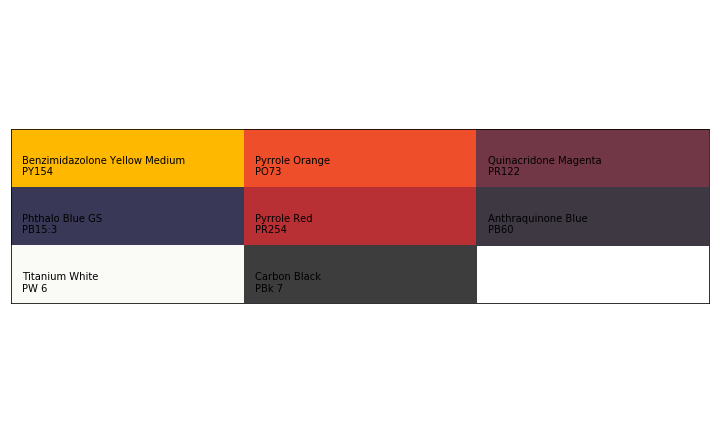

In [4]:
color_swatches = [colour.plotting.ColourSwatch(name=x["color"] + '\n' + x["index_name"], RGB=x["rgb"]) for x in colors]
colour.plotting.plot_multi_colour_swatches(color_swatches, columns=3, width=1, height=0.25);


## CIE L\*C\*Hab plot

Okay, so now what I'm doing is drawing a color wheel.  The x axis is the hue-angle, the y axis is the chroma.

This is more-or-less the same idea as HSV, it's just that the hue-angle and chroma are more perceptually-based.

If I want green with this palette, I have to mix yellow and blue.  You can visualize a two-color mix as a triangle, with the other half of the triangle somewhere around 180 degrees.  It's always going to be duller than a "pure" green pigment.

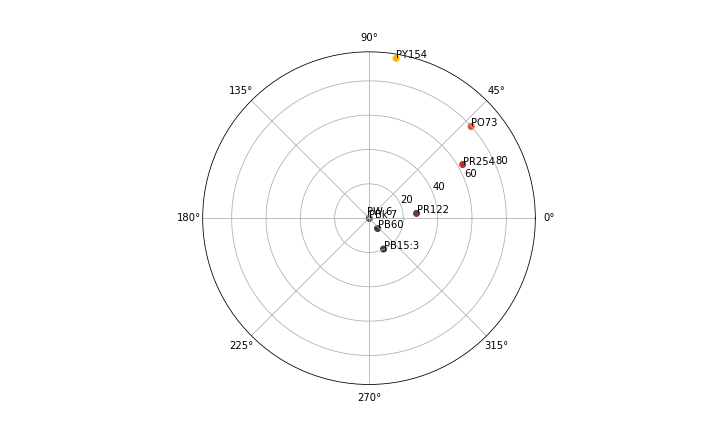

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

theta = []
r = []
c = []

for color in colors:
    lch = color["lch"]
    theta.append(math.radians(lch[2]))
    r.append(lch[1])
    #r.append(10)
    c.append(color["hex"])
    ax.annotate(color["index_name"], xy=(math.radians(lch[2]),lch[1]))
    
c = ax.scatter(theta, r, c=c)

## Plotting a CIE1931 x-y diagram for the palette

You may have seen one of these.  The CIE X-Y-Z color system uses three "impossible" primaries to create a superset of human vision.  This chart shows the range of human vision and then drops each of the pigments in to where it sits.

X-Y-Z is still, by the way, a lie.  It avoids some problems with RGB colors, but if I wanted to start to approximate how colors mix, I'd need to get plot of each pigment and how it reflects light across the spectrum.

You can see here how a few of the pigments are actually right at the edge of what a human being can see.

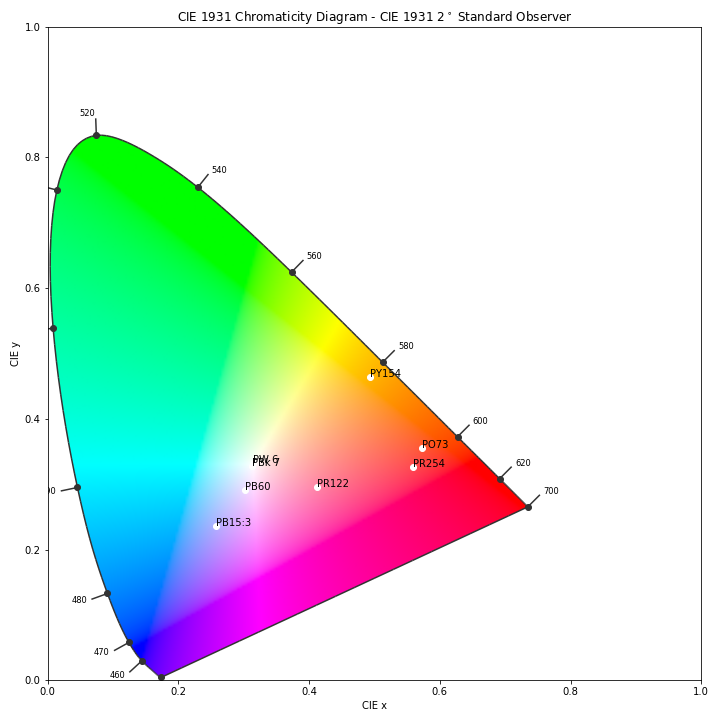

In [6]:
colour.plotting.plot_chromaticity_diagram_CIE1931(standalone=False)

x = []
y = []

for color in colors:
    dx,dy = colour.XYZ_to_xy(color["xyz"])
    x.append(dx)
    y.append(dy)
    plt.annotate(color["index_name"], xy=(dx,dy))

plt.scatter(x,y, c='white')

# Displaying the plot.
colour.plotting.render(
    standalone=True,
    limits=(-0.1, 0.9, -0.1, 0.9),
    x_tighten=True,
    y_tighten=True);

## Conclusion

Colour-science is pretty neat, actually.  But... this is going to end up with me buying some color measuring tools, isn't it?  Alternatively, what happens if I use the Munsell colors instead of the L\*a\*b\* colors?